
# **Capstone Project 2 - Yes Bank Stock Closing Price Prediction**

##**(Supervised - Regression)**

##**Project by:-Suvendu Dey**

##**Data Science Trainee at AlmaBetter**

##**Problem Statement**

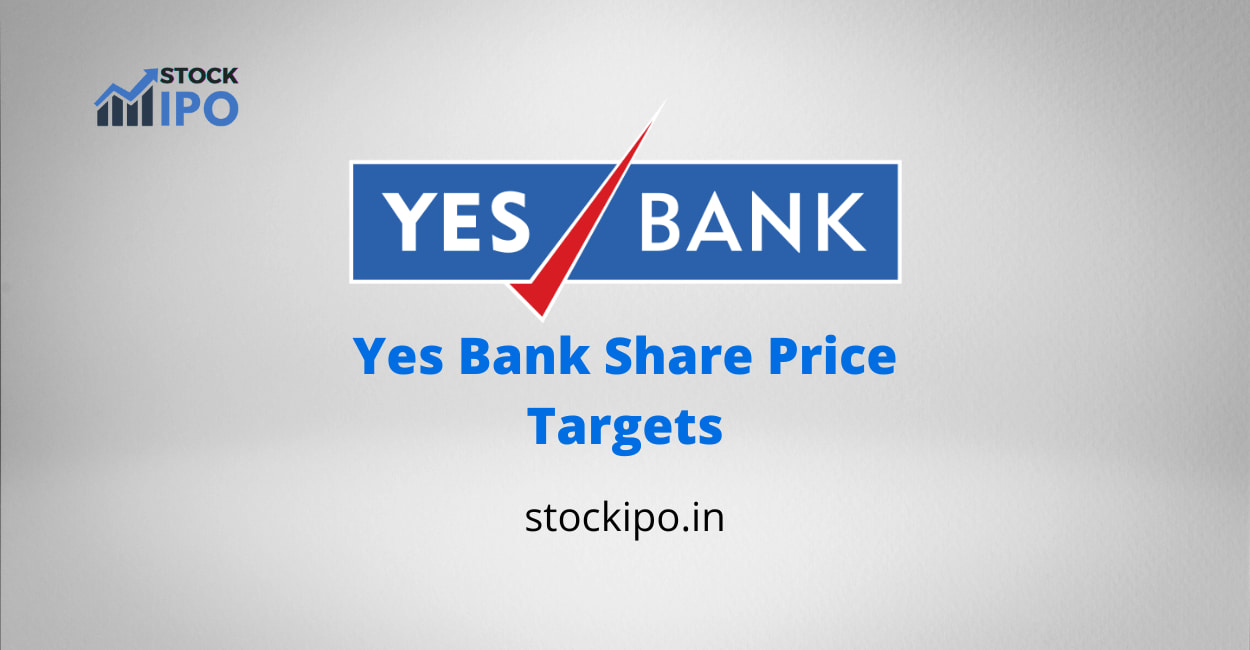


# ***Yes Bank is a well-known bank in the Indian financial domain. Since 2018, it has been in the news because of the fraud case involving Rana Kapoor. Owing to this fact, it was interesting to see how that impacted the stock prices of the company and whether Time series models or any other predictive models can do justice to such situations. This dataset has monthly stock prices of the bank since its inception and includes closing, starting, highest, and lowest stock prices of every month. The main objective is to predict the stock’s closing price of the month.***

# **In that problem first know what is Stock?**

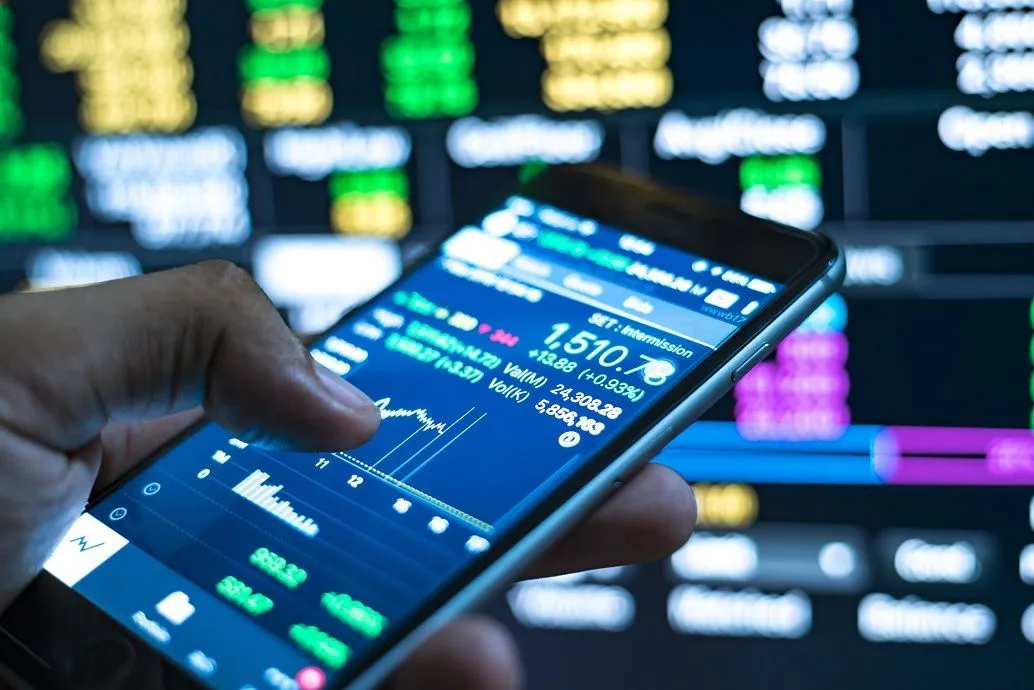

Stocks are financial securities that represent part-ownership in one or more companies. Upon buying a company’s stock, you become a shareholder of that company. The stock certificate serves as proof of ownership and mentions the number of stocks you hold. You can buy stocks of a single company or several companies. There is no limit on the number of stocks you can hold in your portfolio.

In general, investors aim to buy the stocks of companies that are likely to increase in value. When such appreciation takes place, the stockholder can sell the stocks and earn a profit. Apart from this, as a result of their part-ownership, stockholders often receive a share of the company’s profits in the form of monthly, quarterly, or annual dividend payments. Buying stocks is thus a lucrative way to make money. Plus, it reduces the impact of market inflation over a period.

# **Bussiness Goal :**
**The main objective is to predict the stock's closing price of the month.To determine the YES bank's stock’s future value on the national stock exchange. The advantage of a successful prediction of a stock's future price could results insignificant profit. The efficient-market hypothesis recommends that stock costs mirror all right now accessible data and any value changes that are not founded on recently uncovered data subsequently are an unpredictable.We have to build model which help us to predict the future stock prices.**

# **Steps to solve this problem**

# 1.Load the dataset
# 2.Exploratory Data Analysis On Data
# 3. Preprocess the data
# 4. Build machine learning model.
# 5. Check model data actual VS predict
# 6. Compare all model which model are best fit
# 7. Conclusion.

# **importing all Libraries**

In [1]:
# import libraries
import numpy as np
import pandas as pd

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge, RidgeCV
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import Lasso, LassoCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from datetime import datetime   

# import required metrics
from sklearn.metrics import (r2_score,mean_squared_error,  mean_absolute_percentage_error, mean_absolute_error)

#to display all the graph in the workbook 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style("whitegrid",{'grid.linestyle': '--'})


# Ignore all warnings
import warnings
warnings.filterwarnings("ignore")


In [2]:
# mount drive to load dataset
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# file path of dataset
file_path='/content/drive/MyDrive/CapstoneProject/data_YesBank_StockPrices.csv'
df=pd.read_csv(file_path)

# **Exploratory data analysis**

In [4]:
# First five row sample of dataset
df.head()

,Date,Open,High,Low,Close
0,Jul-05,13.00,14.00,11.25,12.46
1,Aug-05,12.58,14.88,12.55,13.42
2,Sep-05,13.48,14.87,12.27,13.30
3,Oct-05,13.20,14.47,12.40,12.99
4,Nov-05,13.35,13.88,12.88,13.41


# **Data description**


**Open=Price at stock started trading when the market open on the particular day**

**High=Highest stock price during a period**

**Low=lowest stock price during a period**

**Date= date of stock price**

**Close=Price of an indivisual stock when the stock exchange close the market of the day(Taget/dependent variable)**


In [5]:
#checking shape of data
df.shape

(185, 5)

Total 185 rows and 5 columns are there

In [6]:
#checking the column of data
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close'], dtype='object')

In [7]:
#checking info of data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185 entries, 0 to 184
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    185 non-null    object 
 1   Open    185 non-null    float64
 2   High    185 non-null    float64
 3   Low     185 non-null    float64
 4   Close   185 non-null    float64
dtypes: float64(4), object(1)
memory usage: 7.4+ KB


In [8]:
#check the null value
df.isnull().sum()

Date     0
Open     0
High     0
Low      0
Close    0
dtype: int64

No null value are there in that dataset

In [9]:
#apply the describe funcution to check mean,median,mode,count 
df.describe()


,Open,High,Low,Close
count,185.000000,185.000000,185.000000,185.000000
mean,105.541405,116.104324,94.947838,105.204703
std,98.879850,106.333497,91.219415,98.583153
min,10.000000,11.240000,5.550000,9.980000
25%,33.800000,36.140000,28.510000,33.450000
50%,62.980000,72.550000,58.000000,62.540000
75%,153.000000,169.190000,138.350000,153.300000
max,369.950000,404.000000,345.500000,367.900000


In [10]:
# convert string object to datetime object
df['Date'] = df['Date'].apply(lambda x: datetime.strptime(x, "%b-%y"))

In [11]:
#top five rows
df.head()

,Date,Open,High,Low,Close
0,2005-07-01,13.00,14.00,11.25,12.46
1,2005-08-01,12.58,14.88,12.55,13.42
2,2005-09-01,13.48,14.87,12.27,13.30
3,2005-10-01,13.20,14.47,12.40,12.99
4,2005-11-01,13.35,13.88,12.88,13.41


In [12]:
#Check stock price staring and ending date
print(f'stock prices between {df.Date.min()} {df.Date.max()}')
print(f'Total days ={(df.Date.max()-df.Date.min()).days} days')

stock prices between 2005-07-01 00:00:00 2020-11-01 00:00:00
Total days =5602 days


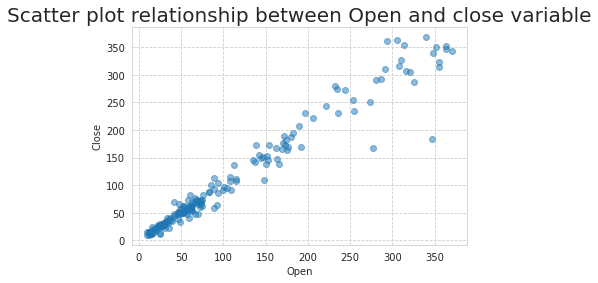

In [13]:
#scatter plot relation ship between open and close variable
plt.scatter(df['Open'], df['Close'], alpha=0.5)
plt.title('Scatter plot relationship between Open and close variable',fontsize=20)
plt.xlabel('Open')
plt.ylabel('Close')
plt.show()

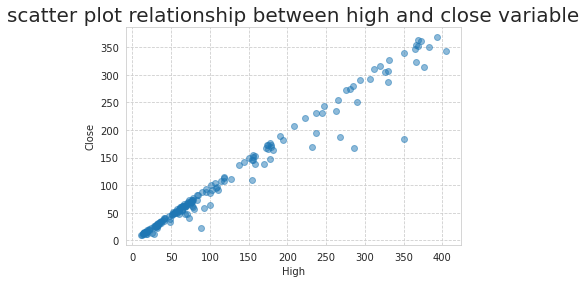

In [14]:
#scatter plot relation ship between High and close variable
plt.scatter(df['High'], df['Close'], alpha=0.5)
plt.title('scatter plot relationship between high and close variable',fontsize=20)
plt.xlabel('High')
plt.ylabel('Close')
plt.show()

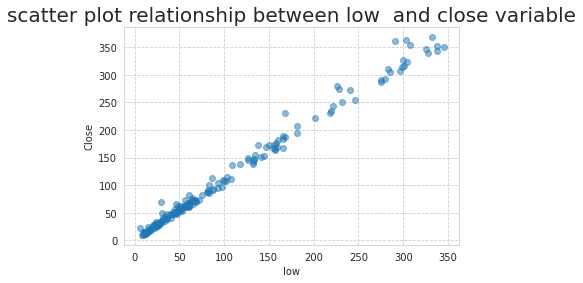

In [15]:
#scatter plot relation ship between low and close variable
plt.scatter(df['Low'], df['Close'], alpha=0.5)
plt.title('scatter plot relationship between low  and close variable',fontsize=20)
plt.xlabel('low')
plt.ylabel('Close')
plt.show()

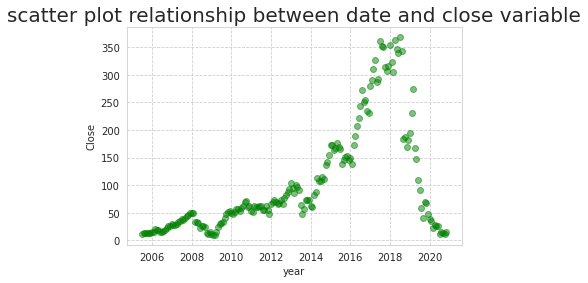

In [16]:
#scatter plot relation ship between Date and close variable
plt.scatter(df['Date'], df['Close'], alpha=0.5,color='g')
plt.title('scatter plot relationship between date and close variable',fontsize=20)
plt.xlabel('year')
plt.ylabel('Close')
plt.show()

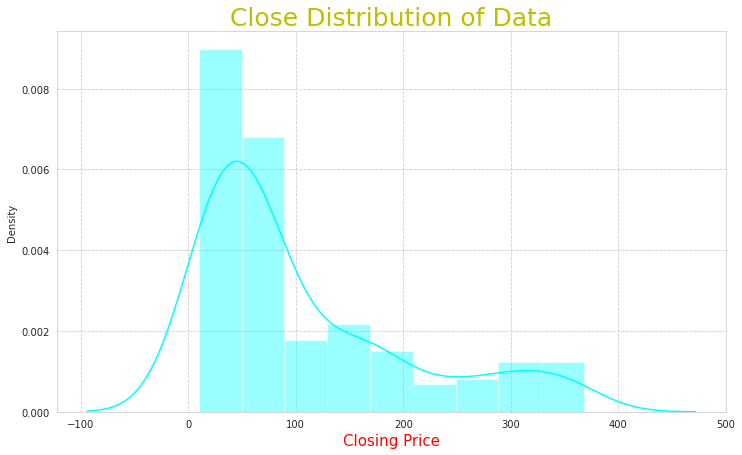

In [17]:
# Dependent variable 'Closing price'
plt.figure(figsize=(12,7))
sns.distplot(df['Close'],color="cyan")
plt.title('Close Distribution of Data',color='y',fontsize=25)
plt.xlabel('Closing Price',color='r',fontsize=15)
plt.show()

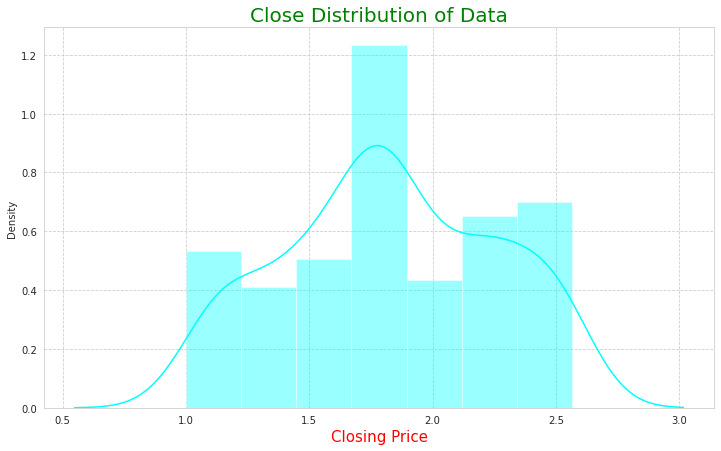

In [18]:
# Dependent variable 'Closing price'
plt.figure(figsize=(12,7))
sns.distplot(np.log10(df['Close']),color="cyan")
plt.title('Close Distribution of Data',color='g',fontsize=20)
plt.xlabel('Closing Price',color='r',fontsize=15)
plt.show()


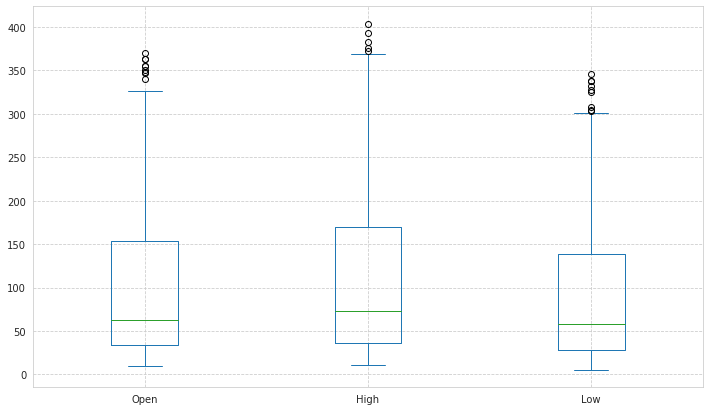

In [19]:
#create a box plot
df[['Open','High','Low']].plot(kind='box',figsize=(12,7))
#show plot
plt.show()

Text(0.5, 1.0, 'plot of dependent varible')

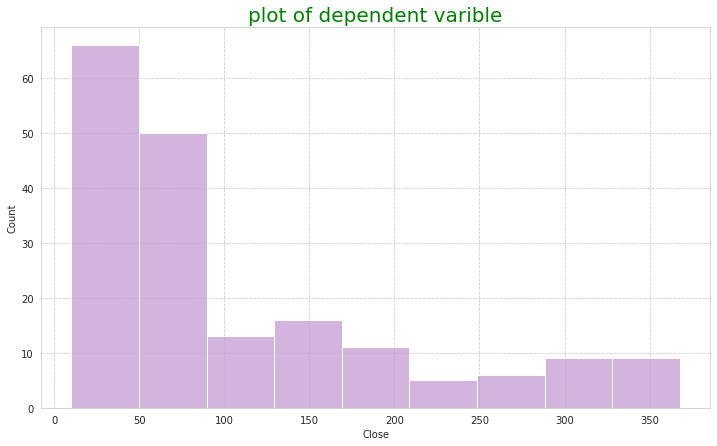

In [20]:
#Histplot of dependent variable
plt.figure(figsize=(12,7))
sns.histplot(df['Close'],color='#C39BD3')
plt.title('plot of dependent varible',color='g',fontsize=20)

In [21]:
#counting dependent_variable
df.Close.value_counts()

12.46     1
137.67    1
176.52    1
168.60    1
165.74    1
         ..
61.21     1
62.54     1
52.59     1
51.29     1
14.67     1
Name: Close, Length: 185, dtype: int64

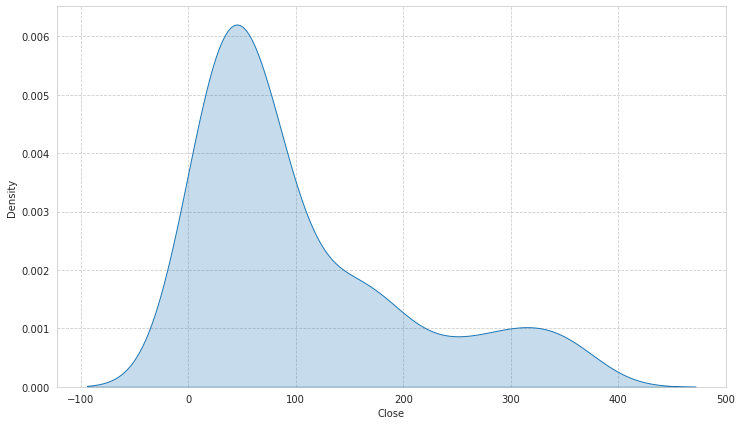

In [22]:
# KDE plot of dependent variable
plt.figure(figsize=(12,7)) 
sns.kdeplot(data=df['Close'], shade=True)


Text(0, 0.5, 'close')

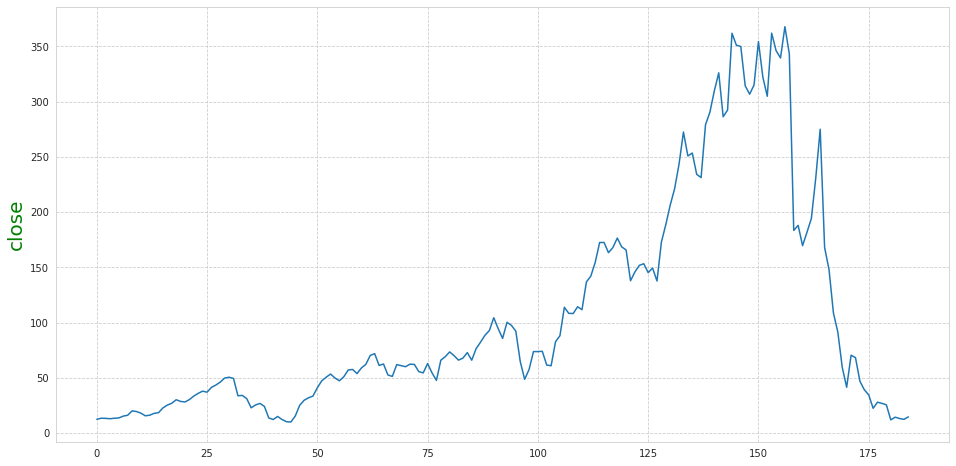

In [23]:
#plot of target variable
plt.figure(figsize=(16,8))
plt.plot(df['Close'], label='Close Price history')
plt.ylabel('close',fontsize=20,color='g')

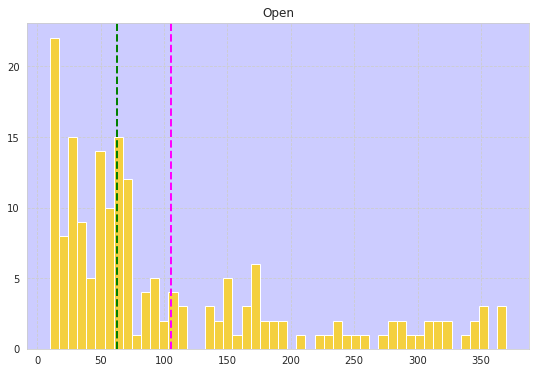

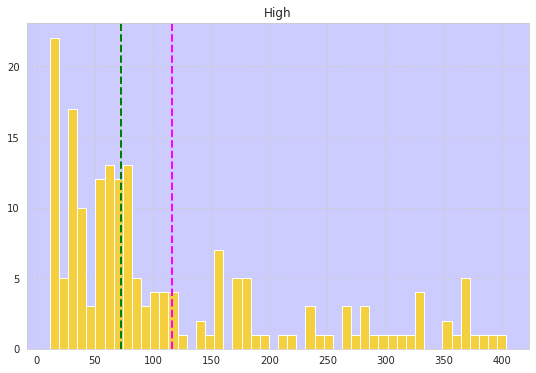

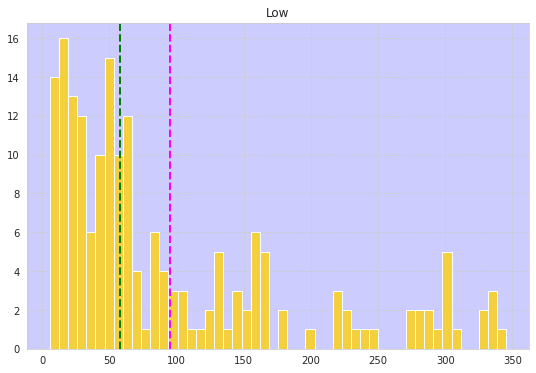

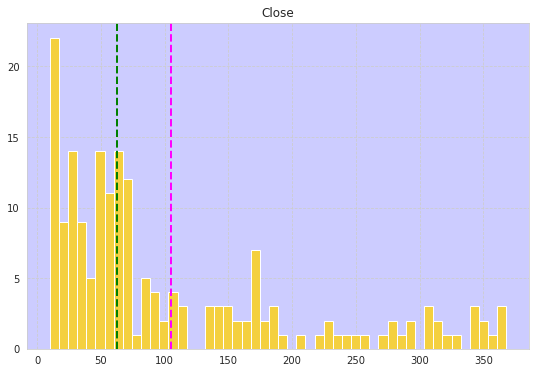

In [24]:
# Check for skewness in the dataset mean and median of graph
numeric_features = df.describe().columns
for col in numeric_features[0:4]:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = df[col]
    feature.hist(bins=50, ax = ax,color='#F4D03F')
    ax.axvline(feature.mean(), color='magenta', linestyle='dashed', linewidth=2)
    ax.axvline(feature.median(), color='g', linestyle='dashed', linewidth=2)
    plt.axes().set_facecolor("#CCCCFF")    
    ax.set_title(col)
plt.show()

In [25]:
#import libraries
import plotly.express as px
# visualise the data
fig = px.line(df, df['Date'], df['Close'],title='Monthly closing price')
fig.update_layout(
    xaxis=dict(title='Year of Data'),
    yaxis=dict(title='price'),
    autosize=False,
    width=1400,
    height=400)

fig.show()
     

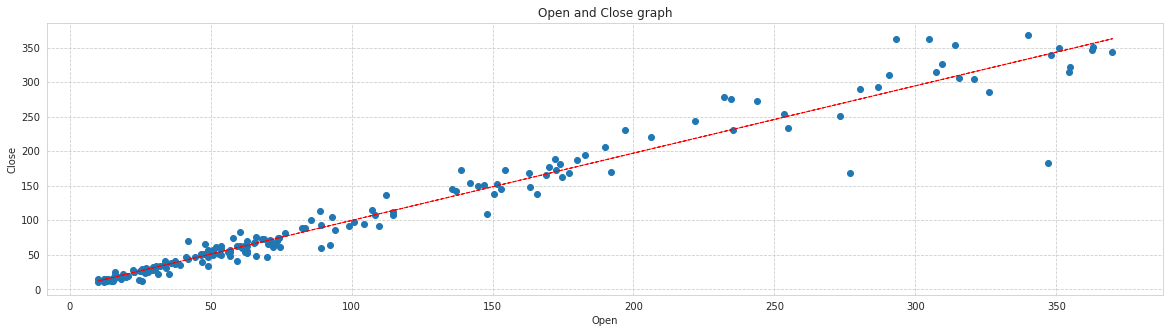

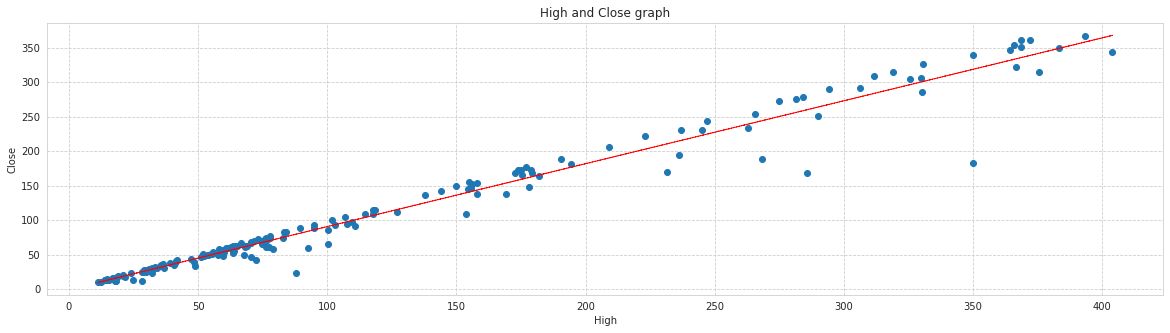

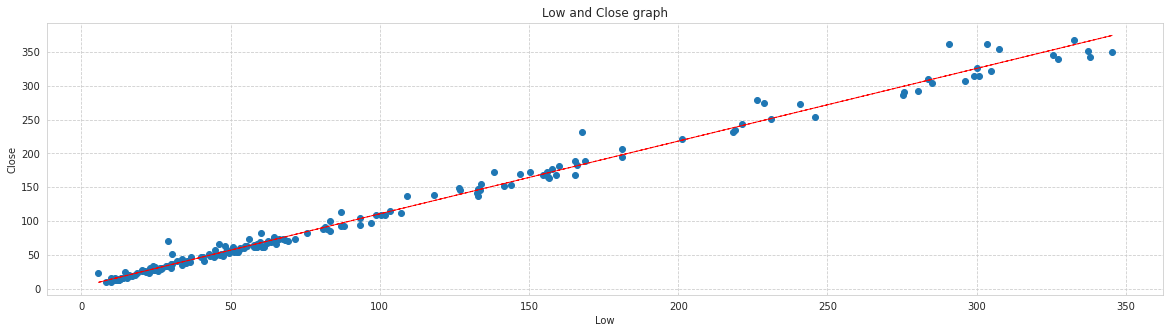

In [26]:
# scatter plot to see the relationship between dependent & independent variables
for col in df.describe().columns[:-1]:
  fig = plt.figure(figsize=(20,5))
  ax = fig.gca()
  plt.scatter(df[col], df['Close'])
  plt.xlabel(col)
  plt.ylabel('Close')
  ax.set_title('{} and Close graph'.format(col))
  z = np.polyfit(df[col], df['Close'], 1)
  y_hat = np.poly1d(z)(df[col])
  plt.plot(df[col], y_hat, "r--", lw=1)
  plt.show()

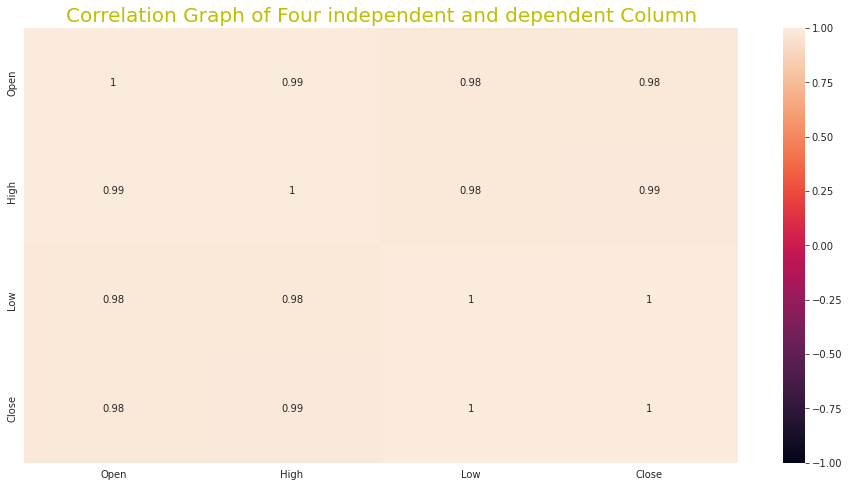

In [27]:
#heatmap graph 
plt.figure(figsize=(16,8))
plt.title('Correlation Graph of Four independent and dependent Column',fontsize = 20,color='y')
sns.heatmap(df.corr(),vmin=-1, vmax=1,annot=True)

# **four independent variable are closely correlated to each other..so add new features of average of Open,Close and High three independent vaiable**

In [28]:
# Creating a new feature based on average of other features in the dataset
df['Avg_independent_variable'] = df[['Open', 'High', 'Low']].mean(axis=1).round(2)
df.head()

,Date,Open,High,Low,Close,Avg_independent_variable
0,2005-07-01,13.00,14.00,11.25,12.46,12.75
1,2005-08-01,12.58,14.88,12.55,13.42,13.34
2,2005-09-01,13.48,14.87,12.27,13.30,13.54
3,2005-10-01,13.20,14.47,12.40,12.99,13.36
4,2005-11-01,13.35,13.88,12.88,13.41,13.37


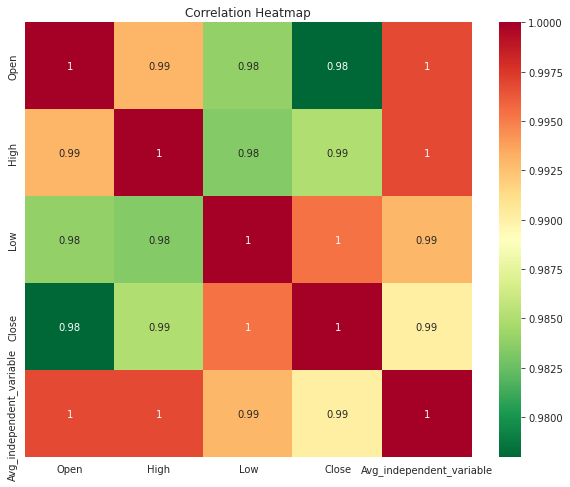

In [29]:
# correlation between features
plt.figure(figsize=(10, 8))
sns.heatmap(abs(df.corr()),annot=True, cmap = 'RdYlGn_r')
plt.title('Correlation Heatmap')
plt.show()

In [30]:
df.head()

,Date,Open,High,Low,Close,Avg_independent_variable
0,2005-07-01,13.00,14.00,11.25,12.46,12.75
1,2005-08-01,12.58,14.88,12.55,13.42,13.34
2,2005-09-01,13.48,14.87,12.27,13.30,13.54
3,2005-10-01,13.20,14.47,12.40,12.99,13.36
4,2005-11-01,13.35,13.88,12.88,13.41,13.37


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185 entries, 0 to 184
Data columns (total 6 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Date                      185 non-null    datetime64[ns]
 1   Open                      185 non-null    float64       
 2   High                      185 non-null    float64       
 3   Low                       185 non-null    float64       
 4   Close                     185 non-null    float64       
 5   Avg_independent_variable  185 non-null    float64       
dtypes: datetime64[ns](1), float64(5)
memory usage: 8.8 KB


# **Building our machine learning model**

In [32]:
# choose appropriate dependent and independent variables
y = df['Close'].values
x = df[['Open','High','Low','Avg_independent_variable']].values


In [33]:
# split the dataset into train and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2,random_state=0)


In [34]:
print("The shape of train dataset :")
print(x_train.shape)

print("\n The shape of test dataset :")
print(x_test.shape)

The shape of train dataset :
(148, 4)

 The shape of test dataset :
(37, 4)


In [35]:
print("Distribution of classes of dependent variable in train :")
print(y_train.shape)

print("\n Distribution of classes of dependent variable in test :")
print(y_test.shape)

Distribution of classes of dependent variable in train :
(148,)

 Distribution of classes of dependent variable in test :
(37,)


In [36]:
#cheack the column of independent variable
x_train

array([[142.08, 155.  , 134.  , 143.69],
       [ 16.2 ,  20.95,  16.02,  17.72],
       [ 92.4 , 100.4 ,  57.71,  83.5 ],
       [ 59.5 ,  72.55,  40.95,  57.67],
       [ 10.04,  17.51,   9.94,  12.5 ],
       [ 49.2 ,  78.94,  44.8 ,  57.65],
       [ 47.8 ,  52.06,  47.3 ,  49.05],
       [ 35.98,  41.04,  35.02,  37.35],
       [ 49.99,  55.56,  30.24,  45.26],
       [ 25.6 ,  28.3 ,  11.1 ,  21.67],
       [ 94.  , 100.15,  83.42,  92.52],
       [ 14.3 ,  15.34,  12.75,  14.13],
       [ 39.1 ,  40.7 ,  33.6 ,  37.8 ],
       [ 30.2 ,  32.6 ,  26.8 ,  29.87],
       [309.6 , 330.58, 300.2 , 313.46],
       [ 69.  ,  77.88,  66.2 ,  71.03],
       [314.  , 366.  , 307.35, 329.12],
       [ 22.8 ,  28.47,  21.4 ,  24.22],
       [ 41.2 ,  52.34,  36.8 ,  43.45],
       [ 56.  ,  60.08,  51.2 ,  55.76],
       [355.  , 366.5 , 304.65, 342.05],
       [ 14.79,  17.8 ,  11.25,  14.61],
       [ 88.8 , 117.6 ,  86.98,  97.79],
       [ 30.66,  36.14,  29.11,  31.97],
       [107.4 , 

In [37]:
#check the value in dependent variable
y_train

array([154.57,  20.08,  64.76,  41.45,  15.45,  57.5 ,  50.97,  37.93,
        50.54,  11.95,  85.71,  13.15,  34.55,  28.63, 326.14,  73.46,
       354.45,  25.32,  47.31,  54.5 , 322.25,  12.26, 113.89,  33.51,
       114.33,  59.5 , 346.2 ,  67.83,  97.49, 145.92,  43.48,  92.84,
       108.38, 149.38,  14.37, 100.28,  70.3 ,  13.3 ,  53.83,  74.02,
       188.73,  10.26,  18.03, 104.41,  55.61,  26.85, 108.7 , 176.52,
       136.83,  48.65, 350.  ,  27.95,  40.99, 151.82,  92.2 ,  61.21,
       206.39,  15.03,  61.02,  33.45,  31.93,  65.97,  17.84, 290.56,
        35.98,  14.67, 137.9 ,  28.14,  22.78,  65.99,  82.7 ,  50.57,
        73.74,  54.49,  12.99,  12.42, 181.75,  15.33,  61.98,  62.9 ,
        72.85, 234.28,  16.16, 292.37, 183.45,  18.46,  12.46,  94.5 ,
       188.05,  25.12,  15.62, 168.6 ,  61.59,  22.85,  57.1 ,  62.54,
        13.42, 165.74, 315.05,  12.24,  88.14, 243.44, 169.65,  26.97,
        24.13, 272.56,  53.41, 351.15, 172.91,  31.13,  46.18, 172.5 ,
      

# **Rescalling the data**

In [38]:
# Transforming data
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)
 

# **Model fit the Linear Regression**

In [39]:
# initialize and fit linear regression
regressor=LinearRegression()
regressor.fit(x_train,y_train)

LinearRegression()

In [40]:
#check linear regressor intercept
regressor.intercept_

98.37756756756727

In [41]:
#check linear regressor coefficient
regressor.coef_

array([  608.99259568,   744.1168616 ,   685.60708013, -1934.33147323])

In [42]:
#predict the train and test data
y_pred_train=regressor.predict(x_train)
y_pred_test=regressor.predict(x_test)

In [43]:
# Get the r2_score for train and test dataset
r2_score_train = r2_score(y_train,y_pred_train)
r2_score_test = r2_score(y_test,y_pred_test)

In [44]:
#linear regressor of value of MAE,MSE,RMSE,r2_score

MAE =  mean_absolute_error((y_test), (y_pred_test))
print("MAE :",MAE)

MSE  = mean_squared_error((y_test), (y_pred_test))
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

print("r2_score_train :",r2_score_train)

print("r2_score_test :",r2_score_test)

# adjusted R-squared for trainning data
adj_r2_train = 1 - ( ( 1- regressor.score(x_train, y_train) ) * ( len(y_train) - 1 ) / ( len(y_train) - x_train.shape[1] - 1 ) )
print(f"Adjusted R2 Score for Trainning Data : {adj_r2_train}")

# adjusted R-squared for testing data
adj_r2_test = 1 - ( ( 1- regressor.score(x_test, y_test) ) * ( len(y_test) - 1 ) / ( len(y_test) - x_test.shape[1] - 1 ) )
print(f"Adjusted R2 Score for Testing Data : {adj_r2_test}")



MAE : 5.393967869250938
MSE : 77.86475735017966
RMSE : 8.82410093721619
r2_score_train : 0.9954549785388916
r2_score_test : 0.9930823177047207
Adjusted R2 Score for Trainning Data : 0.995327845071448
Adjusted R2 Score for Testing Data : 0.9922176074178107


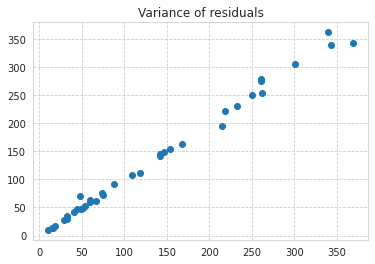

In [45]:
# Check for homoscadacity
plt.scatter(y_pred_test, y_test)
plt.title('Variance of residuals')
plt.show()

# **Linear Regression model of test data of actual vs predicted**

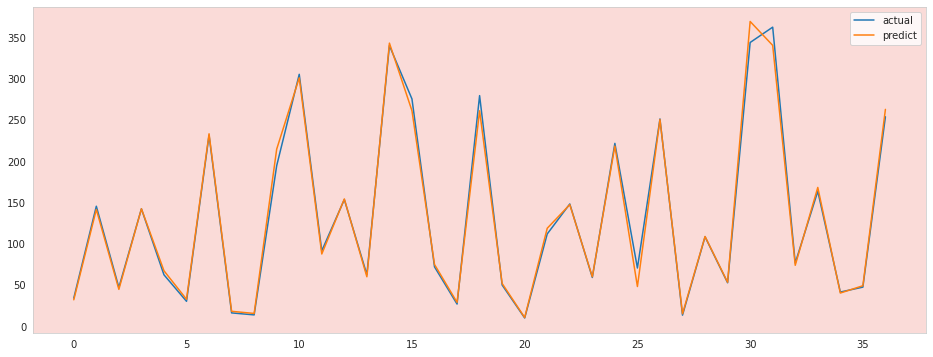

In [46]:
# On Test data
plt.figure( figsize=(16,6) )
plt.plot(np.array(y_test))
plt.plot( np.array(y_pred_test))
plt.grid()
plt.axes().set_facecolor("#FADBD8")
plt.legend(['actual','predict'])
plt.show()

# **Implementing lasso regression**

In [47]:
# Finding best alpha value using GridseachCV hyperprarameter tuning for Lasso regulerization
lasso = Lasso()
parameters = {'alpha': [ 1e-16,1e-15,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1,5,10,15,20,25]}
lasso = GridSearchCV(lasso, parameters, scoring='neg_mean_squared_error', cv=5)
lasso.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1e-16, 1e-15, 1e-10, 1e-08, 1e-05, 0.0001,
                                   0.001, 0.01, 1, 5, 10, 15, 20, 25]},
             scoring='neg_mean_squared_error')

In [48]:
# best alpha value
print(lasso.best_params_)

{'alpha': 0.01}


In [49]:
# Fitting the model with best parameter
lasso_regressor = Lasso(alpha=0.01)
lasso_regressor.fit(x_train, y_train)

Lasso(alpha=0.01)

In [50]:
# check lasso intercept
lasso_regressor.intercept_

98.37756756756755

In [51]:
#check lasso coefficient
lasso_regressor.coef_

array([-10.17337532,  80.17986437, 118.0222697 , -92.75571092])

In [52]:
#predict the train and test data
y_pred_train=lasso_regressor.predict(x_train)
y_pred_test=lasso_regressor.predict(x_test)

In [53]:
# Get the r2_score for train and test dataset
r2_score_train = r2_score(y_train,y_pred_train)
r2_score_test = r2_score(y_test,y_pred_test)

In [54]:
#lasso regressor of value of MAE,MSE,RMSE,r2_score

MAE =  mean_absolute_error((y_test), (y_pred_test))
print("MAE :",MAE)

MSE  = mean_squared_error((y_test), (y_pred_test))
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

print("r2_score_train :",r2_score_train)

print("r2_score_test :",r2_score_test)

# adjusted R-squared for trainning data
adj_r2_train = 1 - ( ( 1- lasso_regressor.score(x_train, y_train) ) * ( len(y_train) - 1 ) / ( len(y_train) - x_train.shape[1] - 1 ) )
print(f"Adjusted R2 Score for Trainning Data : {adj_r2_train}")

# adjusted R-squared for testing data
adj_r2_test = 1 - ( ( 1- lasso_regressor.score(x_test, y_test) ) * ( len(y_test) - 1 ) / ( len(y_test) - x_test.shape[1] - 1 ) )
print(f"Adjusted R2 Score for Testing Data : {adj_r2_test}")

MAE : 5.431329899172831
MSE : 78.97150665327509
RMSE : 8.88659139677723
r2_score_train : 0.9954532079254947
r2_score_test : 0.992983991577216
Adjusted R2 Score for Trainning Data : 0.9953260249304037
Adjusted R2 Score for Testing Data : 0.9921069905243679


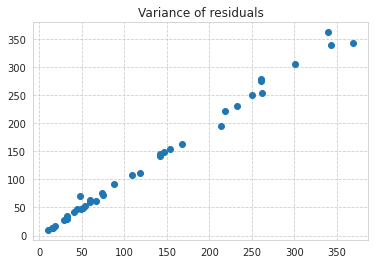

In [55]:
# Check for homoscadacity
plt.scatter(y_pred_test, y_test)
plt.title('Variance of residuals')
plt.show()

# **Lasso Regressor of test data : Actual VS predict**

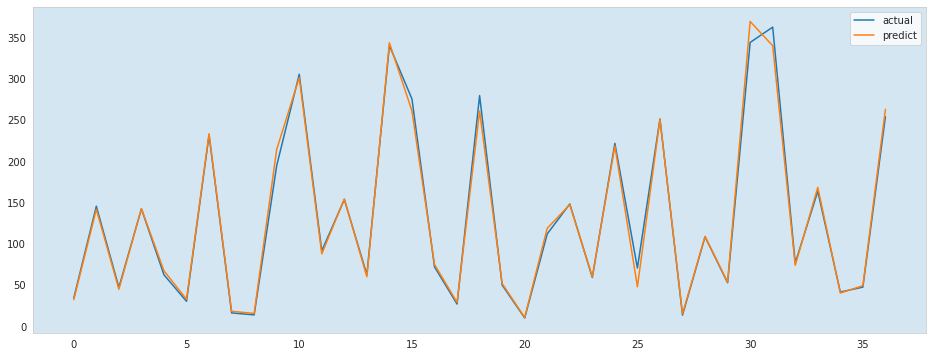

In [56]:
# On Test data
plt.figure( figsize=(16,6) )
plt.plot(np.array(y_test))
plt.plot( np.array(y_pred_test))
plt.grid()
plt.axes().set_facecolor("#D4E6F1")
plt.legend(['actual','predict'])
plt.show()

# **Implementing Ridge regression**

In [57]:
# Finding best alpha value using GridseachCV hyperprarameter tuning
ridge = Ridge()
parameters = {'alpha': np.arange(0.00001,1,0.5)}
ridge = GridSearchCV(ridge, parameters, scoring='neg_mean_squared_error', cv=5)
ridge.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': array([1.0000e-05, 5.0001e-01])},
             scoring='neg_mean_squared_error')

In [58]:
# print best alpha value
print(ridge.best_params_)

{'alpha': 1e-05}


In [59]:
# Fitting the model with best parameter
ridge_regressor = Ridge(alpha=1e-05)
ridge_regressor.fit(x_train, y_train)

Ridge(alpha=1e-05)

In [60]:
#check ridge coefficient
ridge_regressor.coef_

array([-44.35957032,  45.75565071,  87.69233791,   5.68686936])

In [61]:
#check ridge intercept
ridge_regressor.intercept_

98.37756756756757

In [62]:
#predict the train and test dataset
y_pred_train=ridge_regressor.predict(x_train)
y_pred_test=ridge_regressor.predict(x_test)

In [63]:
# Get the roc_auc score for train and test dataset
r2_score_train = r2_score(y_train,y_pred_train)
r2_score_test = r2_score(y_test,y_pred_test)

In [64]:
#ridge regressor of value of MSE,RMSE,r2_score
MAE =  mean_absolute_error((y_test), (y_pred_test))
print("MAE :",MAE)

MSE  = mean_squared_error((y_test), (y_pred_test))
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

print("r2_score_train :",r2_score_train)

print("r2_score_test :",r2_score_test)

# adjusted R-squared for trainning data
adj_r2_train = 1 - ( ( 1- ridge_regressor.score(x_train, y_train) ) * ( len(y_train) - 1 ) / ( len(y_train) - x_train.shape[1] - 1 ) )
print(f"Adjusted R2 Score for Trainning Data : {adj_r2_train}")

# adjusted R-squared for testing data
adj_r2_test = 1 - ( ( 1- ridge_regressor.score(x_test, y_test) ) * ( len(y_test) - 1 ) / ( len(y_test) - x_test.shape[1] - 1 ) )
print(f"Adjusted R2 Score for Testing Data : {adj_r2_test}")

MAE : 5.397642995454397
MSE : 77.87345288861283
RMSE : 8.824593638724268
r2_score_train : 0.9954546467325314
r2_score_test : 0.9930815451732916
Adjusted R2 Score for Trainning Data : 0.995327503983791
Adjusted R2 Score for Testing Data : 0.992216738319953


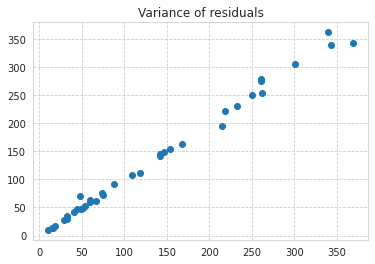

In [65]:
# Check for homoscadacity
plt.scatter(y_pred_test, y_test)
plt.title('Variance of residuals')
plt.show()

# **Ridge model: Actual VS predict**

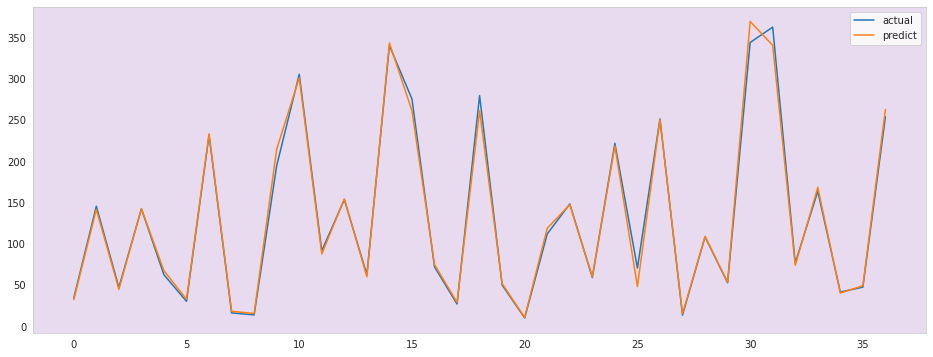

In [66]:
# On Test data
plt.figure( figsize=(16,6) )
plt.plot(np.array(y_test))
plt.plot( np.array(y_pred_test))
plt.grid()
plt.axes().set_facecolor("#E8DAEF")
plt.legend(['actual','predict'])
plt.show()

# **Implementing elasticnet regression**

In [67]:
#initialize and fit elasticnet regression
elastic = ElasticNet()
parameters = {'alpha': [1e-50,1e-40,1e-8,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100],'l1_ratio':[0.3,0.4,0.5,0.6,0.7,0.8,0.9]}
elastic = GridSearchCV(elastic, parameters, scoring='neg_mean_squared_error',cv=5)
elastic.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=ElasticNet(),
             param_grid={'alpha': [1e-50, 1e-40, 1e-08, 0.0001, 0.001, 0.01,
                                   0.1, 1, 5, 10, 20, 30, 40, 45, 50, 55, 60,
                                   100],
                         'l1_ratio': [0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]},
             scoring='neg_mean_squared_error')

In [68]:
# print best alpha value
print(elastic.best_params_)

{'alpha': 0.001, 'l1_ratio': 0.3}


In [69]:
# Fitting the model with best parameter
elasticnet_regressor = ElasticNet(alpha=0.001,l1_ratio=0.3)
elasticnet_regressor.fit(x_train, y_train)

ElasticNet(alpha=0.001, l1_ratio=0.3)

In [70]:
#check elastic coefficient
elasticnet_regressor.coef_

array([-34.71718652,  49.50825531,  92.27762595, -12.20050054])

In [71]:
#check elastic intercept
elasticnet_regressor.intercept_

98.37756756756757

In [72]:
#predict the train and test dataset
y_pred_train=elasticnet_regressor.predict(x_train)
y_pred_test=elasticnet_regressor.predict(x_test)

In [73]:
# Get the roc_auc score for train and test dataset
r2_score_train = r2_score(y_train,y_pred_train)
r2_score_test = r2_score(y_test,y_pred_test)

In [74]:
#elasticnet regressor of value of MSE,RMSE,r2_score
MAE =  mean_absolute_error((y_test), (y_pred_test))
print("MAE :",MAE)

MSE  = mean_squared_error((y_test), (y_pred_test))
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

print("r2_score_train :",r2_score_train)

print("r2_score_test :",r2_score_test)

# adjusted R-squared for trainning data
adj_r2_train = 1 - ( ( 1- elasticnet_regressor.score(x_train, y_train) ) * ( len(y_train) - 1 ) / ( len(y_train) - x_train.shape[1] - 1 ) )
print(f"Adjusted R2 Score for Trainning Data : {adj_r2_train}")

# adjusted R-squared
adj_r2_test = 1 - ( ( 1- elasticnet_regressor.score(x_test, y_test) ) * ( len(y_test) - 1 ) / ( len(y_test) - x_test.shape[1] - 1 ) )
print(f"Adjusted R2 Score for Testing Data : {adj_r2_test}")

MAE : 5.460264280375918
MSE : 81.00161435131655
RMSE : 9.00008968573739
r2_score_train : 0.9954373510105495
r2_score_test : 0.9928036321879599
Adjusted R2 Score for Trainning Data : 0.9953097244653901
Adjusted R2 Score for Testing Data : 0.9919040862114549


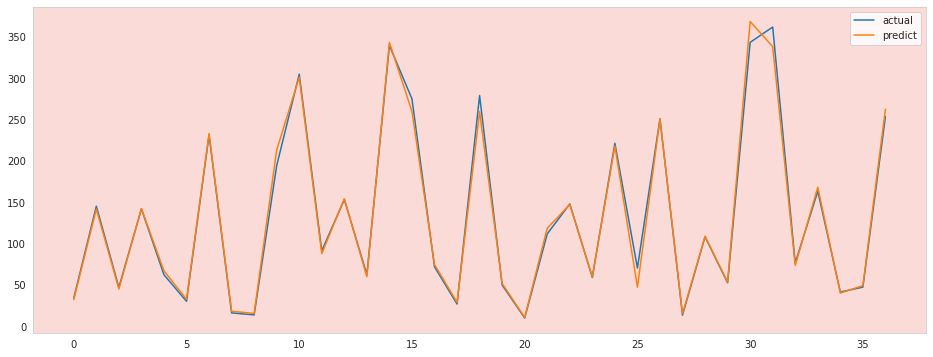

In [75]:
# On Test data
plt.figure( figsize=(16,6) )
plt.plot(np.array(y_test))
plt.plot( np.array(y_pred_test))
plt.grid()
plt.axes().set_facecolor("#FADBD8")
plt.legend(['actual','predict'])
plt.show()

# **Implementing of Decision Trees**

In [76]:
 # Decison Tree Regressor model trainning on best parameters got from GridsearchCV hyperparameter tuning.
tree_regressor = DecisionTreeRegressor(criterion = 'mse', max_depth = 9, max_leaf_nodes=76, min_samples_leaf = 1, min_samples_split=2) 
tree_regressor.fit(x_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=9, max_leaf_nodes=76)

In [77]:
# Trainning Score on Decision Tree Regressor with best parameters

tree_regressor.score(x_train, y_train)

0.9999359860536022

In [78]:
# Testing Score on Decision Tree Regressor with best parameters
tree_regressor.score(x_test, y_test)

0.9761257649416907

In [79]:
#predict the train and test dataset
y_pred_train=tree_regressor.predict(x_train)
y_pred_test=tree_regressor.predict(x_test)

In [80]:
# Get the roc_auc score for train and test dataset
r2_score_train = r2_score(y_train,y_pred_train)
r2_score_test = r2_score(y_test,y_pred_test)

In [81]:
#elasticnet regressor of value of MAE,MSE,RMSE,r2_score
MAE =  mean_absolute_error((y_test), (y_pred_test))
print("MAE :",MAE)

MSE  = mean_squared_error((y_test), (y_pred_test))
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

print("r2_score_train :",r2_score_train)

print("r2_score_test :",r2_score_test)

# adjusted R-squared for trainning data
adj_r2_train = 1 - ( ( 1- tree_regressor.score(x_train, y_train) ) * ( len(y_train) - 1 ) / ( len(y_train) - x_train.shape[1] - 1 ) )
print(f"Adjusted R2 Score for Trainning Data : {adj_r2_train}")

# adjusted R-squared
adj_r2_test = 1 - ( ( 1- tree_regressor.score(x_test, y_test) ) * ( len(y_test) - 1 ) / ( len(y_test) - x_test.shape[1] - 1 ) )
print(f"Adjusted R2 Score for Testing Data : {adj_r2_test}")

MAE : 10.012765765765767
MSE : 268.72606176276287
RMSE : 16.39286618510512
r2_score_train : 0.9999359860536022
r2_score_test : 0.9761257649416907
Adjusted R2 Score for Trainning Data : 0.999934195453703
Adjusted R2 Score for Testing Data : 0.973141485559402


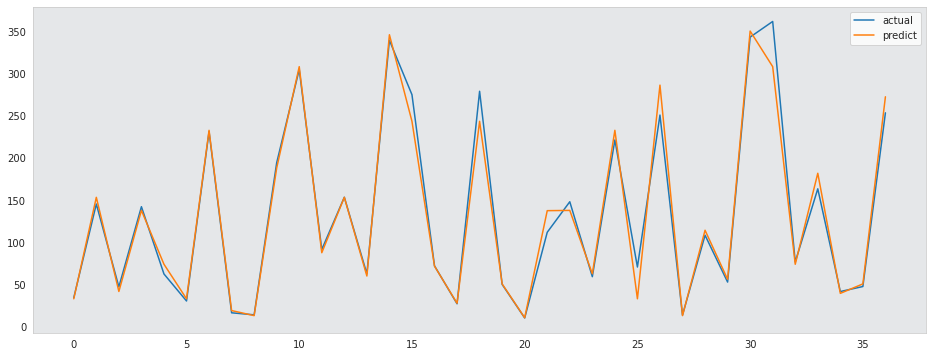

In [82]:
# On Test data
plt.figure( figsize=(16,6) )
plt.plot(np.array(y_test))
plt.plot( np.array(y_pred_test))
plt.grid()
plt.axes().set_facecolor("#E5E7E9")
plt.legend(['actual','predict'])
plt.show()

# **Implementing of RandomForestRegressor**

In [83]:
# Hyperparameter tuning for Random Forest Regressor
rfr = RandomForestRegressor()
# grid_values = {'n_estimators':list(np.arange(1,100)), 'max_depth':list(np.arange(1,20))}
param_grid = { 
            "n_estimators"      : np.arange(50,100),
            "max_features"      : ["auto", "sqrt", "log2"],
            "min_samples_split" : np.arange(1,6),
            "bootstrap": [True, False]
            }
# random_forest_gridsearch = GridSearchCV(estimator = dtr, param_grid = grid_values, scoring = 'roc_auc', cv=5)
random_forest= GridSearchCV(rfr, param_grid, n_jobs=-1, cv=5)
random_forest.fit(x_train, y_train)


GridSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_split': array([1, 2, 3, 4, 5]),
                         'n_estimators': array([50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66,
       67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83,
       84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])})

In [84]:
random_forest.best_params_

{'bootstrap': True,
 'max_features': 'auto',
 'min_samples_split': 4,
 'n_estimators': 84}

In [85]:
# Random Forest Regressor model trainning on best parameters got from GridsearchCV hyperparameter tuning.
random_forest_best = RandomForestRegressor(bootstrap= True, max_features = 'auto', min_samples_split = 2, n_estimators = 58) 
random_forest_best.fit(x_train, y_train)

RandomForestRegressor(n_estimators=58)

In [86]:
y_pred_train=random_forest_best.predict(x_train)
y_pred_test=random_forest_best.predict(x_test)

In [87]:
# Get the roc_auc score for train and test dataset
r2_score_train = r2_score(y_train,y_pred_train)
r2_score_test = r2_score(y_test,y_pred_test)

In [88]:
#randomforest regressor of value of MAE,MSE,RMSE,r2_score
MAE =  mean_absolute_error((y_test), (y_pred_test))
print("MAE :",MAE)

MSE  = mean_squared_error((y_test), (y_pred_test))
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

print("r2_score_train :",r2_score_train)

print("r2_score_test :",r2_score_test)

# adjusted R-squared for trainning data
adj_r2_train = 1 - ( ( 1- random_forest_best.score(x_train, y_train) ) * ( len(y_train) - 1 ) / ( len(y_train) - x_train.shape[1] - 1 ) )
print(f"Adjusted R2 Score for Trainning Data : {adj_r2_train}")

# adjusted R-squared
adj_r2_test = 1 - ( ( 1- random_forest_best.score(x_test, y_test) ) * ( len(y_test) - 1 ) / ( len(y_test) - x_test.shape[1] - 1 ) )
print(f"Adjusted R2 Score for Testing Data : {adj_r2_test}")


MAE : 7.797371854613249
MSE : 153.4851434119616
RMSE : 12.388912115757444
r2_score_train : 0.997517891022464
r2_score_test : 0.9863640304638169
Adjusted R2 Score for Trainning Data : 0.9974484614007147
Adjusted R2 Score for Testing Data : 0.9846595342717941


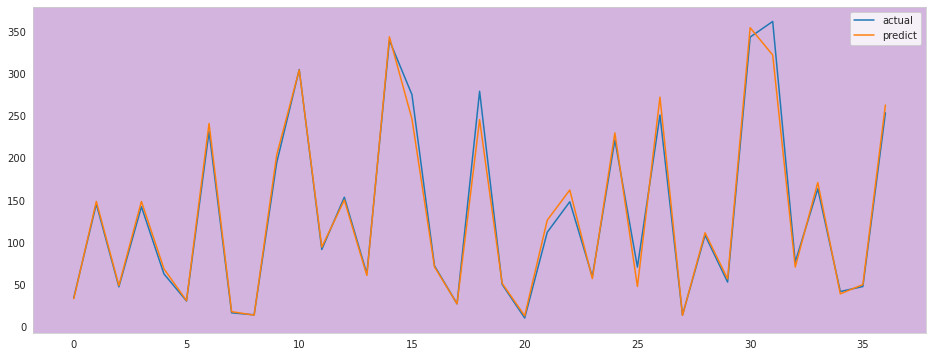

In [89]:
# On Test data
plt.figure( figsize=(16,6) )
plt.plot(np.array(y_test))
plt.plot( np.array(y_pred_test))
plt.grid()
plt.axes().set_facecolor("#D2B4DE")
plt.legend(['actual','predict'])
plt.show()

# **implementing of GradientBoosting Regressor**

In [90]:
#initialize and fit GradientBoosting regressor
gb_regressor=GradientBoostingRegressor()
gb_regressor.fit(x_train,y_train)


GradientBoostingRegressor()

In [91]:
y_pred_train=gb_regressor.predict(x_train)
y_pred_test=gb_regressor.predict(x_test)

In [92]:
# Get the roc_auc score for train and test dataset
r2_score_train = r2_score(y_train,y_pred_train)
r2_score_test = r2_score(y_test,y_pred_test)

In [93]:
#randomforest regressor of value of MAE,MSE,RMSE,r2_score
MAE =  mean_absolute_error((y_test), (y_pred_test))
print("MAE :",MAE)

MSE  = mean_squared_error((y_test), (y_pred_test))
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

print("r2_score_train :",r2_score_train)

print("r2_score_test :",r2_score_test)

# adjusted R-squared for trainning data
adj_r2_train = 1 - ( ( 1- gb_regressor.score(x_train, y_train) ) * ( len(y_train) - 1 ) / ( len(y_train) - x_train.shape[1] - 1 ) )
print(f"Adjusted R2 Score for Trainning Data : {adj_r2_train}")

# adjusted R-squared
adj_r2_test = 1 - ( ( 1- gb_regressor.score(x_test, y_test) ) * ( len(y_test) - 1 ) / ( len(y_test) - x_test.shape[1] - 1 ) )
print(f"Adjusted R2 Score for Testing Data : {adj_r2_test}")

MAE : 8.70815389125126
MSE : 201.34385692995576
RMSE : 14.1895685956253
r2_score_train : 0.9997111655941736
r2_score_test : 0.9821121534087154
Adjusted R2 Score for Trainning Data : 0.9997030863100945
Adjusted R2 Score for Testing Data : 0.9798761725848049


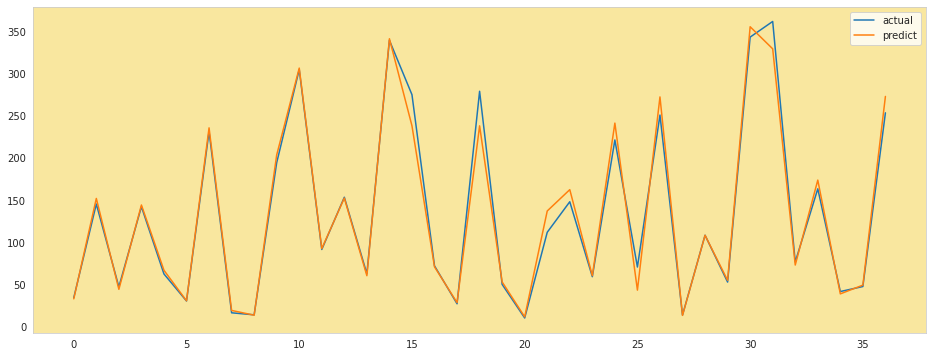

In [94]:
# On Test data
plt.figure( figsize=(16,6) )
plt.plot(np.array(y_test))
plt.plot( np.array(y_pred_test))
plt.grid()
plt.axes().set_facecolor("#F9E79F")
plt.legend(['actual','predict'])
plt.show()

# **implementing from XGBRegressor**

In [95]:
#initialize and fit GradientBoosting regressor
xgb_regressor=XGBRegressor()
parameters = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100],'l1_ratio':[0.3,0.4,0.5,0.6,0.7,0.8]}
elastic = GridSearchCV(xgb_regressor, parameters, scoring='neg_mean_squared_error',cv=5)
xgb_regressor.fit(x_train,y_train)

[04:25:42] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor()

In [96]:
# Trainning Score on XGB Regressor with best parameters
xgb_regressor.score(x_train, y_train)

0.9994727777817414

In [97]:
# Trainning Score on XGB Regressor with best parameters
xgb_regressor.score(x_train, y_train)

0.9994727777817414

In [98]:
y_pred_train=xgb_regressor.predict(x_train)
y_pred_test=xgb_regressor.predict(x_test)

In [99]:
# Get the roc_auc score for train and test dataset
r2_score_train = r2_score(y_train,y_pred_train)
r2_score_test = r2_score(y_test,y_pred_test)

In [100]:
#randomforest regressor of value of MAE,MSE,RMSE,r2_score
MAE =  mean_absolute_error((y_test), (y_pred_test))
print("MAE :",MAE)

MSE  = mean_squared_error((y_test), (y_pred_test))
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

print("r2_score_train :",r2_score_train)

print("r2_score_test :",r2_score_test)

# adjusted R-squared for trainning data
adj_r2_train = 1 - ( ( 1- xgb_regressor.score(x_train, y_train) ) * ( len(y_train) - 1 ) / ( len(y_train) - x_train.shape[1] - 1 ) )
print(f"Adjusted R2 Score for Trainning Data : {adj_r2_train}")

# adjusted R-squared
adj_r2_test = 1 - ( ( 1- xgb_regressor.score(x_test, y_test) ) * ( len(y_test) - 1 ) / ( len(y_test) - x_test.shape[1] - 1 ) )
print(f"Adjusted R2 Score for Testing Data : {adj_r2_test}")

MAE : 8.614087501732081
MSE : 190.32085992750078
RMSE : 13.795682655363626
r2_score_train : 0.9994727777817414
r2_score_test : 0.9830914615552991
Adjusted R2 Score for Trainning Data : 0.9994580303071048
Adjusted R2 Score for Testing Data : 0.9809778942497115


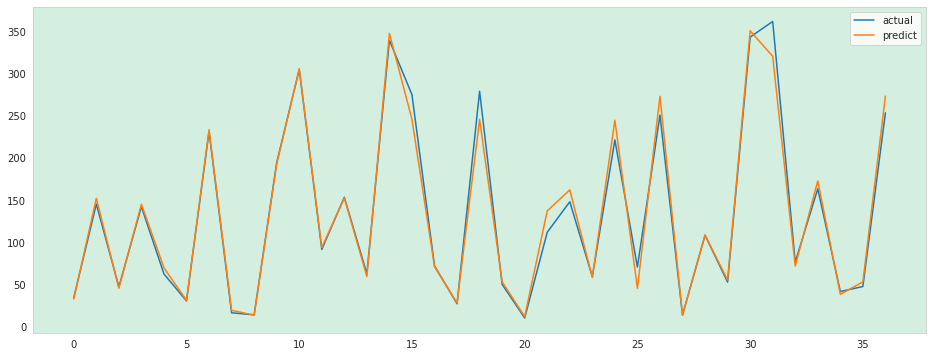

In [101]:
# On Test data
plt.figure( figsize=(16,6) )
plt.plot(np.array(y_test))
plt.plot( np.array(y_pred_test))
plt.grid()
plt.axes().set_facecolor("#D4EFDF")
plt.legend(['actual','predict'])
plt.show()

In [102]:
#Define all models 
model=[
    ['LinearRegression:',regressor],
    ['Lasso:',lasso_regressor],
    ['Ridge:',ridge_regressor],
    ['ElasticNetCV:',elasticnet_regressor],
    ['DecisionTreeRegression:',tree_regressor],
    ['RandomForestRegressor:',random_forest_best],
    ['GradientBoosting Regressor:',gb_regressor],
    ['XGB regressor :',xgb_regressor]
    
]

In [103]:
print(model)

[['LinearRegression:', LinearRegression()], ['Lasso:', Lasso(alpha=0.01)], ['Ridge:', Ridge(alpha=1e-05)], ['ElasticNetCV:', ElasticNet(alpha=0.001, l1_ratio=0.3)], ['DecisionTreeRegression:', DecisionTreeRegressor(criterion='mse', max_depth=9, max_leaf_nodes=76)], ['RandomForestRegressor:', RandomForestRegressor(n_estimators=58)], ['GradientBoosting Regressor:', GradientBoostingRegressor()], ['XGB regressor :', XGBRegressor()]]


In [104]:
model_data=[]
for name,current_model in model:
  curr_model_data={}
  current_model.random_state=1
  curr_model_data['Name']=name
  if(name!='LinearRegression: '):
    current_model.fit(x_train,y_train)
    curr_model_data['MAE']=mean_absolute_error(y_test,current_model.predict(x_test))
    curr_model_data['MSE']=mean_squared_error(y_test,current_model.predict (x_test))
    curr_model_data['RMSE']=np.sqrt(mean_squared_error(y_test, current_model.predict(x_test)))
    curr_model_data['R2_score_train']=r2_score(y_train,current_model.predict (x_train))
    curr_model_data['R2_score_test']=r2_score(y_test,current_model.predict (x_test))
    curr_model_data['adj_R2_score_train']= 1 - ( ( 1- current_model.score(x_train, y_train) ) * ( len(y_train) - 1 ) / ( len(y_train) - x_train.shape[1] - 1 ) ) 
    curr_model_data['adj_R2_score_test']=1 - ( ( 1- current_model.score(x_test, y_test) ) * ( len(y_test) - 1 ) / ( len(y_test) - x_test.shape[1] - 1 ) )
    model_data.append(curr_model_data)


[04:25:43] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [105]:
# create dataframe with evaluation metrics
table_df=pd.DataFrame(model_data)
table_df

,Name,MAE,MSE,RMSE,R2_score_train,R2_score_test,adj_R2_score_train,adj_R2_score_test
0,LinearRegression:,5.393968,77.864757,8.824101,0.995455,0.993082,0.995328,0.992218
1,Lasso:,5.431330,78.971507,8.886591,0.995453,0.992984,0.995326,0.992107
2,Ridge:,5.397643,77.873453,8.824594,0.995455,0.993082,0.995328,0.992217
3,ElasticNetCV:,5.460264,81.001614,9.000090,0.995437,0.992804,0.995310,0.991904
4,DecisionTreeRegression:,10.101414,265.040114,16.280053,0.999936,0.976453,0.999934,0.973510
5,RandomForestRegressor:,7.334660,164.296212,12.817808,0.997470,0.985404,0.997399,0.983579
6,GradientBoosting Regressor:,8.651107,201.429802,14.192597,0.999711,0.982105,0.999703,0.979868
7,XGB regressor :,8.614088,190.320860,13.795683,0.999473,0.983091,0.999458,0.980978


# **Conclusion**
1.With started data inspection, viewed the data distribution, checked for correlation and Close, Open and high price of stock are strongly correlated with each other then create new averaged features.

2.A simple linear regression model was built and it was evaluated using accuracy,mean absoulte error, mean squared error, root mean squared error, r2_score_train and r2_score_test,adjusted r2_train,adjusted r2_test.

3.Additional features were engineered by taking lags and reduced the effect of multi collinearity using regularization techniques such as ridge, lasso and elastic net regression etc.

4.We have implemented Cross Validation on different algorithm as CV performs better on small datasets.But, the result is nearly same.

5.Regression models namely random forest regressor, xgboost regressor are   build. 

